In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr

# Load dataset
df = pd.read_csv('credit_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [5]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
df.dtypes[df.dtypes == "int64"]

default                       int64
duration_in_month             int64
credit_amount                 int64
installment_as_income_perc    int64
present_res_since             int64
age                           int64
credits_this_bank             int64
people_under_maintenance      int64
dtype: object

default : Can be converted to category: 1 default, 0 - not default
duration_in_month, credit_amount,age,people_under_maintenance, credits_this_bank,installment_as_income_perc, present_res_since  - Discrete Numeric


In [28]:
df["default"] = df["default"].astype("object")

In [29]:
df.dtypes[df.dtypes == "object"]

default                    object
account_check_status       object
credit_history             object
purpose                    object
savings                    object
present_emp_since          object
personal_status_sex        object
other_debtors              object
property                   object
other_installment_plans    object
housing                    object
job                        object
telephone                  object
foreign_worker             object
dtype: object

account_check_status, savings, present_emp_since - ordinal  

credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job, telephone, foreign_worker - leave as categorical


In [ ]:
#check for the different types and assign values accordingly
for col in ["account_check_status", "savings", "present_emp_since"]:
    print(df["present_emp_since"].value_counts())
    print()

present_emp_since
1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: count, dtype: int64

present_emp_since
1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: count, dtype: int64

present_emp_since
1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: count, dtype: int64



In [30]:
map_account_check_status = {"no checking account": -99, "< 0 DM ": 1, "0 <= ... < 200 DM": 2, ">= 200 DM / salary assignments for at least 1 year": 3}
map_savings = {"unknown/ no savings account" : -99, "... < 100 DM" : 1,
               "100 <= ... < 500 DM": 2,
               "500 <= ... < 1000 DM": 3,
               ".. >= 1000 DM": 4}
map_present_emp_since = {"unemployed": -99,
                         "... < 1 year" : 1,
                         "1 <= ... < 4 years": 2,
                         "4 <= ... < 7 years": 3,
                         ".. >= 7 years" : 4}

In [34]:
#        Among all customers who default, what is the probability of one being no checking account and savings to default
df[((df["savings"] == "unknown/ no savings account") & (df["account_check_status"] == "no checking account"))]["default"].value_counts()

default
0    90
1     9
Name: count, dtype: int64

 Out of customers who have no savings and no checking account --> there us a 0.1 probability for them to default
 and 0.9 probability for them to not to churn

In [40]:
## Mean of credit amount and mean of credit amount who default
print("Avg credit amount irrespective of default: ",df["credit_amount"].mean())

Avg credit amount irrespective of default:  3271.258


In [39]:
print("default avg credit amount : ",df[df["default"] == 1]["credit_amount"].mean())
print("non default avg credit_amount: ",df[df["default"] == 0]["credit_amount"].mean())

default avg credit amount :  3938.1266666666666
non default avg credit_amount:  2985.457142857143


In [41]:
print("standard deviation of defaulted customers credit amount : ",df[df["default"] == 1]["credit_amount"].std())
print("standard deviation of non-defaulted customers credit_amount: ",df[df["default"] == 0]["credit_amount"].std())

standard deviation of defaulted customers credit amount :  3535.8189550510856
standard deviation of non-defaulted customers credit_amount:  2401.472277825611


In [42]:
print("Variance of defaulted customers credit amount : ",df[df["default"] == 1]["credit_amount"].var())
print("Variance of non-defaulted customers credit_amount: ",df[df["default"] == 0]["credit_amount"].var())

Variance of defaulted customers credit amount :  12502015.68289855
Variance of non-defaulted customers credit_amount:  5767069.101164929


In [45]:
df.describe(include=["int","float"])

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## Count number of non-null values
mean, %50 is median,std max, min

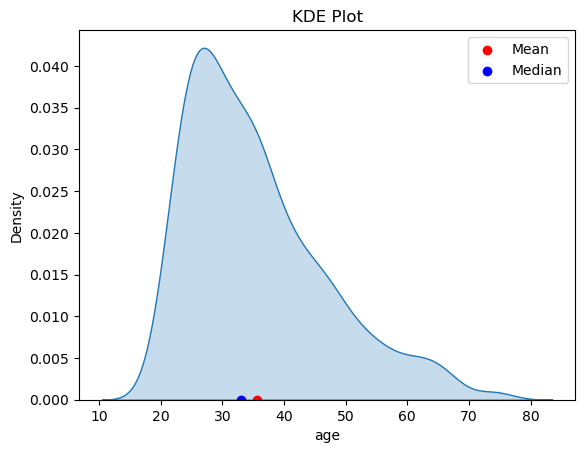

In [56]:
age_mean , age_median = df["age"].mean(), df["age"].median()
sns.kdeplot(df["age"], fill = True)
plt.scatter(age_mean,0 ,label = "Mean", color = "red")
plt.scatter(age_median,0 ,label = "Median", color = "blue")
plt.legend()
plt.title("KDE Plot")
plt.show()
